In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from datasets import BaseDataset, ExpertDataset, DatasetFromSubset
import transforms as T
import PIL

In [3]:
base_transforms = T.Compose(
    [
        T.ToTensor(),
        T.Resize((256, 256)),
    ]
)

transforms = T.Compose(
    [*base_transforms, T.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]
)

dataset = BaseDataset("../data/", transform=transforms, with_background=True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


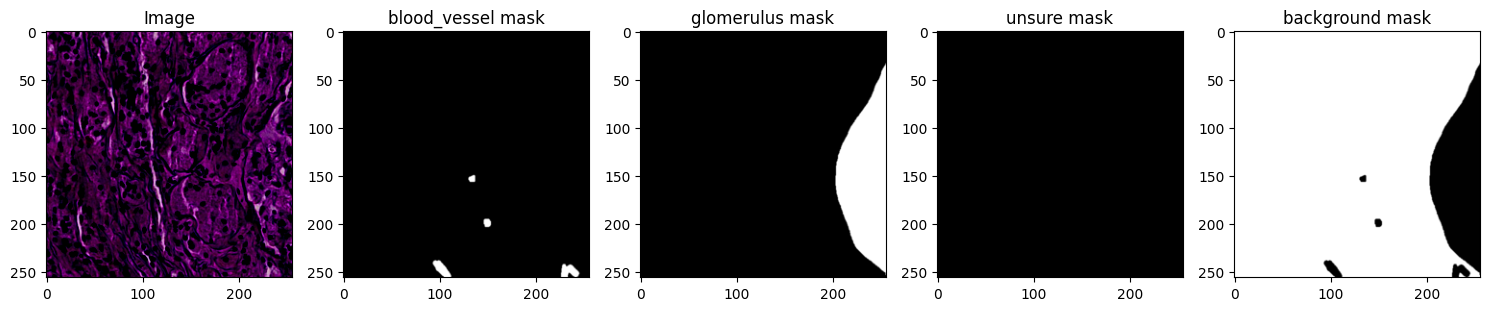

In [3]:
dataset.plot_example(5)

In [62]:
image, target = dataset.get(0, transform=base_transforms)

In [63]:
print(image.size())
print(target.size())

torch.Size([3, 256, 256])
torch.Size([4, 256, 256])


In [64]:
blood_vessels = target[0]
glumerus = target[1]
unsure = target[2]
background = target[3]

In [65]:
import torchvision.transforms as T

toPILImage = T.ToPILImage()

In [66]:
imagePIL = toPILImage(image)

In [67]:
import numpy as np

np.array(imagePIL).shape

(256, 256, 3)

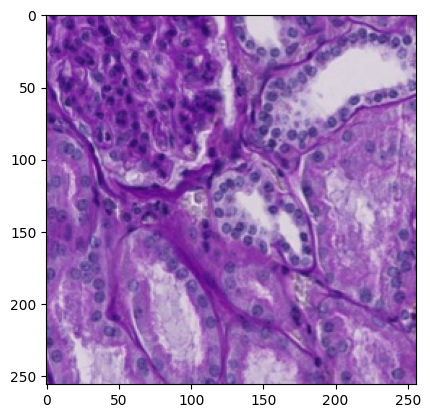

In [68]:
import matplotlib.pyplot as plt

imagePIL = imagePIL.convert("RGBA")
plt.imshow(imagePIL)

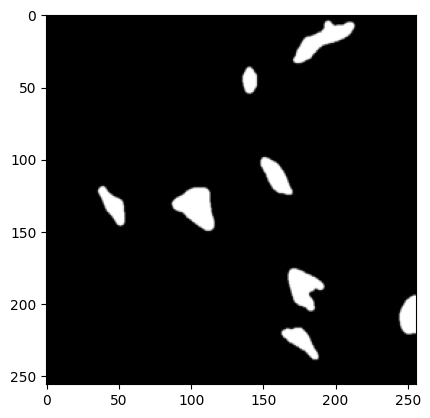

In [69]:
bvTartgetPIL = toPILImage(target[0])
bvTartgetPIL = bvTartgetPIL.convert("RGBA")
plt.imshow(bvTartgetPIL)

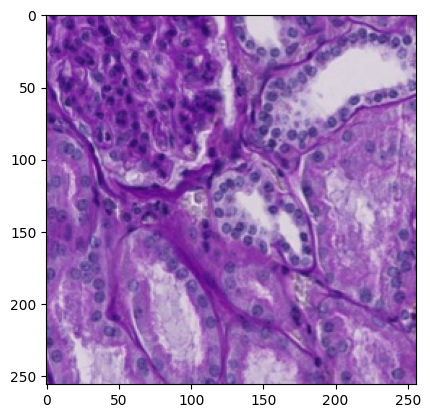

In [70]:
new_img = PIL.Image.blend(imagePIL, bvTartgetPIL, 1)
plt.imshow(imagePIL)

In [72]:
from skimage.color import label2rgb
import torch
import torchvision.transforms as T
import numpy as np
import matplotlib.pyplot as plt

In [132]:
idx = 1

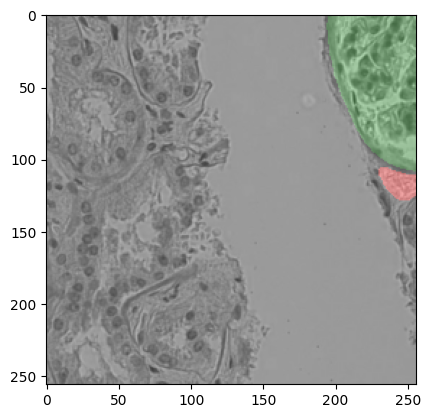

In [140]:
image, target = dataset.get(idx, transform=base_transforms)
image_np = image.permute(1, 2, 0).numpy()

target_argmax = target.argmax(dim=0)
target_np = target_argmax.numpy()

image_label_overlay = label2rgb(target_np, image=image_np, bg_label=3, colors=["red", "green", "blue"], kind="overlay") #, saturation=1.0)

plt.imshow(image_label_overlay)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


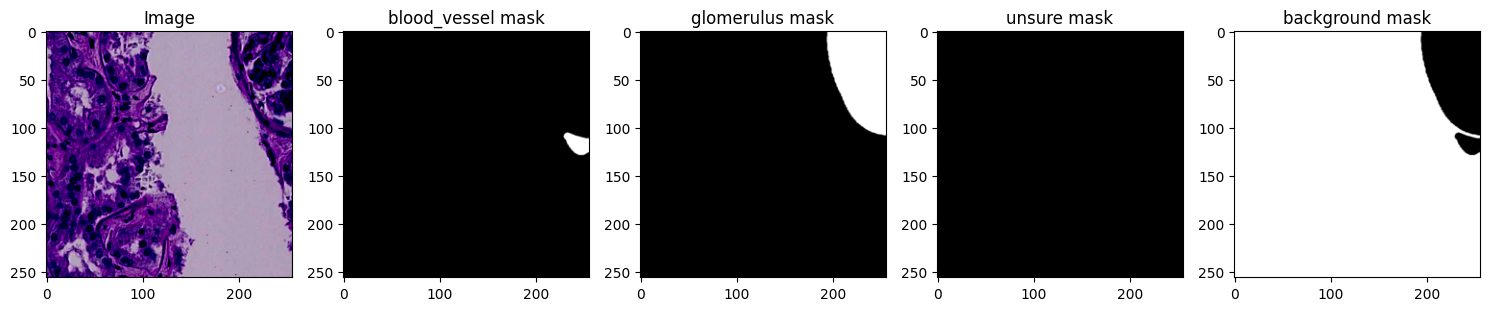

In [141]:
dataset.plot_example(idx)

In [35]:
a = np.array(
    [
        [
            [0, 1, 0],
            [1, 0, 0]
        ], 
        [
            [1, 1, 0],
            [1, 0, 0]
        ]
    ]
)
np.sum(a[:, :, 1:], axis=2)

array([[1, 0],
       [1, 0]])

<class 'numpy.ndarray'>
(203, 284)
7 252


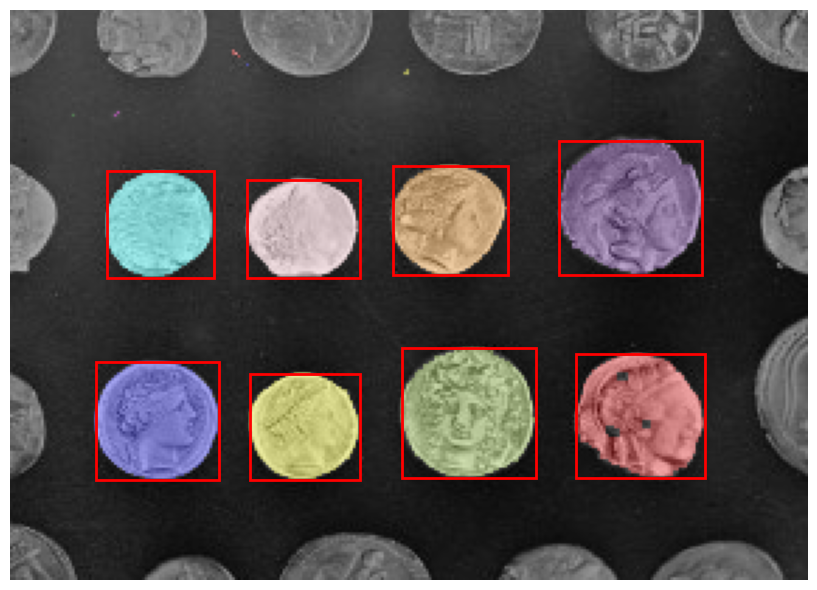

In [76]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from skimage import data
from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
from skimage.morphology import closing, square
from skimage.color import label2rgb


image = data.coins()[50:-50, 50:-50]
print(type(image))
print(image.shape)
print(image.min(), image.max())

# apply threshold
thresh = threshold_otsu(image)
bw = closing(image > thresh, square(3))

# remove artifacts connected to image border
cleared = clear_border(bw)

# label image regions
label_image = label(cleared)
# to make the background transparent, pass the value of `bg_label`,
# and leave `bg_color` as `None` and `kind` as `overlay`
image_label_overlay = label2rgb(label_image, image=image, bg_label=0)

fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(image_label_overlay)

for region in regionprops(label_image):
    # take regions with large enough areas
    if region.area >= 100:
        # draw rectangle around segmented coins
        minr, minc, maxr, maxc = region.bbox
        rect = mpatches.Rectangle(
            (minc, minr),
            maxc - minc,
            maxr - minr,
            fill=False,
            edgecolor="red",
            linewidth=2,
        )
        ax.add_patch(rect)

ax.set_axis_off()
plt.tight_layout()
plt.show()